# Visualizing relationships between feature spaces
When analyzing feature measurements and dimensionality reduction results, e.g. involving a UMAP, one often switches between those spaces. In this notebook we demonstrate how one can interpolated between these spaces.

In [1]:
import pandas as pd
import seaborn as sns

First, we load a pandas dataframe of a .csv file containing some measurements, two UMAP columns and a manual selection of some data points.

In [3]:
df = pd.read_csv('../../data/blobs_statistics_with_umap.csv')

df.head()

,Unnamed: 0,area,mean_intensity,minor_axis_length,major_axis_length,eccentricity,extent,feret_diameter_max,equivalent_diameter_area,bbox-0,bbox-1,bbox-2,bbox-3,UMAP1,UMAP2,selection
0,0,422,192.379147,16.488550,34.566789,0.878900,0.586111,35.227830,23.179885,0,11,30,35,7.685868,3.738014,False
1,1,182,180.131868,11.736074,20.802697,0.825665,0.787879,21.377558,15.222667,0,53,11,74,8.768059,7.172123,True
2,2,661,205.216339,28.409502,30.208433,0.339934,0.874339,32.756679,29.010538,0,95,28,122,6.129949,3.477662,False
3,3,437,216.585812,23.143996,24.606130,0.339576,0.826087,26.925824,23.588253,0,144,23,167,5.410176,4.095456,False
4,4,476,212.302521,19.852882,31.075106,0.769317,0.863884,31.384710,24.618327,0,237,29,256,5.280250,3.861278,False


We then visualize the two UMAP columns and two other columns of features of interest.

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

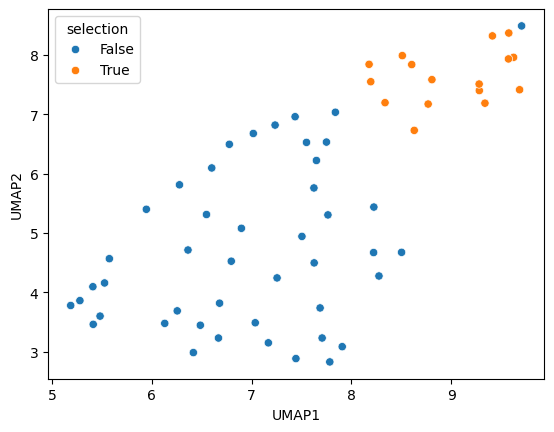

In [10]:
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='selection')

<Axes: xlabel='area', ylabel='feret_diameter_max'>

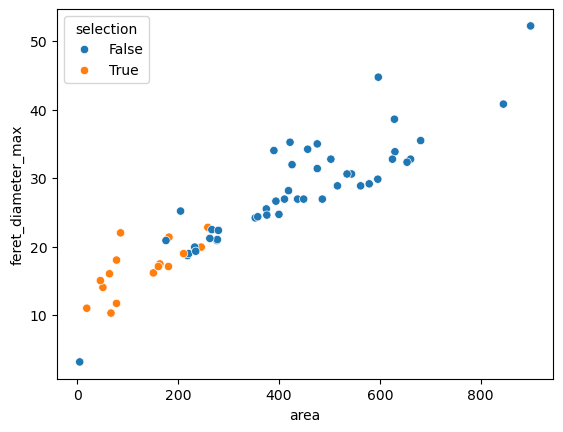

In [9]:
sns.scatterplot(data=df, x='area', y='feret_diameter_max', hue='selection')

## Interpolating between feature spaces
Drawing an animation of plots that are interpolated between the two plots above can be done using Python. As the procedure is a bit complicated, we asked a language model to write this code for us. Manual adaption of the code was done to make the video play back-and-forth and to modify frame delay. Hence, only the last code line was written by a human.

In [2]:
from bia_bob import bob
bob.initialize(model="gpt-4o-2024-08-06", vision_model="gpt-4o-2024-08-06")

c:\structure\code\stackview\stackview\_animate.py:64: UserWarning: The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.
  warnings.warn("The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.")



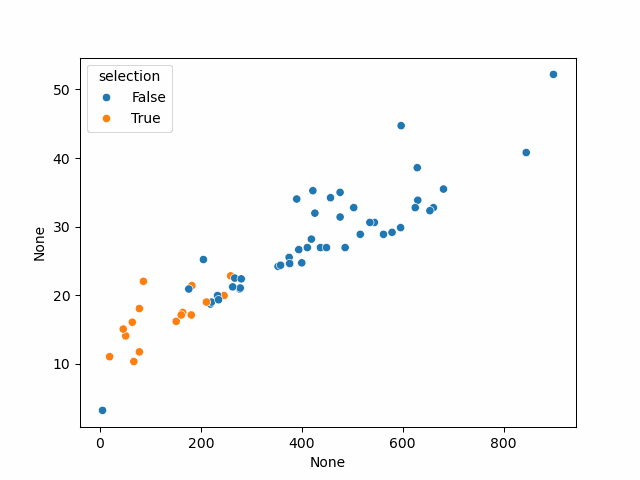

In [8]:
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
import stackview

images = []
num_interp = 10

# Generate scatterplots and store them as images
for i in range(num_interp + 2):
    # Calculate interpolation weights
    w1 = 1 - i / (num_interp + 1)
    w2 = i / (num_interp + 1)
    
    # Set up the figure
    fig, ax = plt.subplots()
    
    # Create the interpolated scatterplot
    sns.scatterplot(data=df, 
                    x=df['area'] * w1 + df['UMAP1'] * w2, 
                    y=df['feret_diameter_max'] * w1 + df['UMAP2'] * w2, 
                    hue='selection', 
                    ax=ax)
    
    # Save the plot to a BytesIO object
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    
    # Load image into numpy array
    image = imread(buf)
    images.append(image)
    
    plt.close(fig)

# Show the list of plots as an animation
stackview.animate(images + images[::-1], frame_delay_ms=250)